## Feature Varying Graph

Plots important values as a function of feature number.

#### Import packages and read in pre-processed dataframes/arrays

In [38]:
import sklearn.ensemble
import sklearn.multiclass
import sklearn.model_selection
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Read in preprocessed dataframes:
featuredf = pd.read_pickle('./processed.files/labelled/featureDfnew')
labelledDf = pd.read_pickle('./processed.files/labelled/labelledDfnew')

#Read in preprocessed numpy arrays:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsnew.npy')

In [39]:
#delcol = featureDf.columns.str.startswith('pixelM')
#featureDf.drop(columns = delcol, inplace=True)
# featureDf.drop(list(featureDf.filter(regex = 'pixelM')), axis = 1, inplace = True)
# preProcFeats = featureDf.values.astype('float32')
# print np.argwhere(np.isfinite(preProcFeats) != True)

## New

In [40]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]
k_fold = sklearn.model_selection.StratifiedKFold(n_splits=3, shuffle=True)

estimator = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False)


rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)
ranked1 = rfe.ranking_

print preProcFeats.shape
print rfe.ranking_

481
(12398, 481)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1 256 257
 253   1   1 255 254   1   1   1   1   1 215 193   1   1   1   1   1   1
   1   1   4   1   1  37   1   1   1   1   1   1   1   1   1   1   6 153
   1  74   1 236   1  29   1   1   1  15  50 166 164   1   1   1   1   2
  41   1 173  69  18  67 119  19   1 155 131 143   9 104 194   1 224  22
  95 198 220 148 127  75   1  62 165   1   5 160  42 175 128 163  82  34
 137   1  83  14 187  86  68  47 111  25 105  21  51   1  97  60   1   1
  31 124 197 106 174 102  61 113 130 170 190  40 123  87 186 204 222 232
 216 139 167 219 207 245 152 238 233  93 237 229   1  94   8 179 225 242
 184  30 189 192  63 199 226 228 214 230  96  99   1   1  85 231  23  72
 136 223 150 171 185 234 172 195 181 212 209   1   1   1  88   1   1 151
 117  27   1 112  43 132  77  92 114  36 122  44 144   1  38   1   1   1
   1   1   1   1   1  45 183 218 178   1 217 140 206 133 145  79 161 200
 108 203   1 109   1   1  48   1  

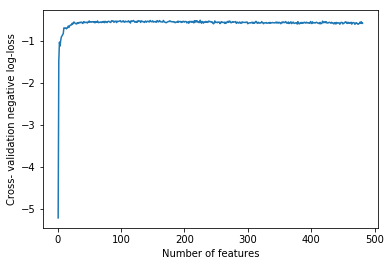

In [41]:
cvscores1 = rfe.grid_scores_
feats1 = range(1, len(cvscores1) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats1, cvscores1)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [42]:
featidx1 = rfe.get_support(indices=True)
featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [43]:
print preProcFeats.shape
redfeat1 = preProcFeats[:, featidx1]
print redfeat1.shape

np.save('./redfeatnew', redfeat)

clf = sklearn.multiclass.OneVsRestClassifier(estimator,
            n_jobs=1)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

(12398, 481)
(12398, 225)
-0.581113629343


## Old

In [44]:
preProcFeats = np.load('./processed.files/labelled/featuresold.npy')
preProcLabels = np.load('./processed.files/labelled/labelsold.npy')

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

ranked2 = rfe.ranking_

print preProcFeats.shape

432
(12398, 432)


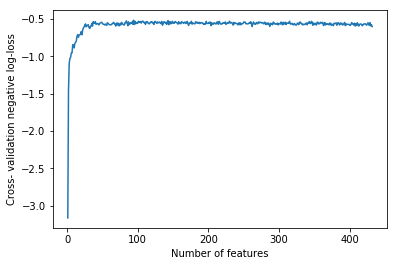

In [46]:
cvscores2 = rfe.grid_scores_
feats2 = range(1, len(cvscores2) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats2, cvscores2)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [47]:
featidx3 = rfe.get_support(indices=True)
#featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [48]:
print preProcFeats.shape
redfeat2 = preProcFeats[:, featidx2]
print redfeat2.shape

np.save('./redfeatold', redfeat)

clf = sklearn.multiclass.OneVsRestClassifier(estimator,
            n_jobs=1)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

(12398, 432)


NameError: name 'featidx2' is not defined

## Binarised

In [ ]:
preProcFeats = np.load('./processed.files/labelled/featuresnew.npy')
preProcLabels = np.load('./processed.files/labelled/labelsoldnew.npy')
preProcLabels[preProcLabels = 9] = 1
preProcLabels[preProcLabels != 9] = 0

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification
print preProcFeats.shape[1]

rfe = RFECV(estimator=estimator, step=1, cv=k_fold, scoring='neg_log_loss')
rfe.fit(preProcFeats, preProcLabels)

ranked2 = rfe.ranking_

print preProcFeats.shape

In [ ]:
cvscores3 = rfe.grid_scores_
feats3 = range(1, len(cvscores3) + 1)

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross- validation negative log-loss')
plt.plot(feats3, cvscores3)
#plt.savefig('feature.importance.graphs/cv.png')
plt.show()

In [ ]:
featidx3 = rfe.get_support(indices=True)
#featureStrs = featuredf.columns.values
#print featureStrs[featidx]

In [ ]:
print preProcFeats.shape
redfeat3 = preProcFeats[:, featidx3]
print redfeat3.shape

#np.save('./redfeatold', redfeat)

clf = sklearn.ensemble.RandomForestClassifier(bootstrap=True, 
            class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
            oob_score=False, random_state=420, verbose=0,
            warm_start=False)

print np.mean(sklearn.model_selection.cross_val_score(clf, redfeat, preProcLabels,\
                                            cv=k_fold, n_jobs=-1, scoring='neg_log_loss'))

## Plot all of them together

In [ ]:
plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross-validation negative log-loss')
plt.plot(range(1, len(cvscores1) + 1), -cvscores1, label = 'new features')
plt.plot(range(1, len(cvscores2) + 1), -cvscores2,  label = 'old features')
plt.plot(range(1, len(cvscores3) + 1), -cvscores3,  label = 'binarised new features')
plt.savefig('feature.importance.graphs/cv.png')
plt.legend()
plt.show()

In [ ]:
slicecvscore1 = cvscores1[10:150]
slicecvscore2 = cvscores2[10:150]
slicefeats1 = feats1[10:150]
slicefeats2 = feats2[10:150]

plt.figure()
plt.xlabel('Number of features')
plt.ylabel('Cross-validation negative log-loss')
plt.plot(range(1, len(slicecvscore1) + 1), -slicecvscore1, label = 'new features')
plt.plot(range(1, len(slicecvscore2) + 1), -slicecvscore2,  label = 'old features')
plt.plot(range(1, len(slicecvscore3) + 1), -slicecvscore3,  label = 'binarised new features')
plt.savefig('graphs/cvslice.png')
plt.legend()
plt.show()